In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1T_tEbUhtPvMseMPRJV7ax8haa2sXabxB'}) # replace the id with id of file you want to access
downloaded.GetContentFile('CubbieStation_08311987.jpg') 

In [0]:
downloaded = drive.CreateFile({'id':'1zJdBu0QdEnjR6FqoEbh9mfRB9olB872Y'}) # replace the id with id of file you want to access
downloaded.GetContentFile('CubbieStation_08232013.jpg') 

In [0]:
downloaded = drive.CreateFile({'id':'1WcEkIqKRFnM0OSyV7otKv2N8k4LG6Pd1'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Andasol_09122013.jpg') 

In [0]:
downloaded = drive.CreateFile({'id':'11lEbNnixp1PWX4E87soFPYj0dY_yjJJe'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Andasol_09051987.jpg')

In [0]:
downloaded = drive.CreateFile({'id':'12xMXkJZ5k30SJYSb2-n-pfWI5KnjWEVK'}) # replace the id with id of file you want to access
downloaded.GetContentFile('candy_images.png')

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,filters,feature
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
% matplotlib inline

In [0]:

!pip show scikit-learn|grep Version

Version: 0.16.2


In [0]:

!pip show scikit-learn|grep Version

Version: 0.22.2.post1


In [0]:
!pip show numpy|grep Version

Version: 1.18.2


In [0]:
import scipy.io

In [0]:
image1 = io.imread('Andasol_09122013.jpg')
image2 = io.imread('Andasol_09051987.jpg')

diff_image = abs(image1 - image2)
print(diff_image.shape)

(1200, 1200)


In [0]:
image1.shape

(1200, 1200)

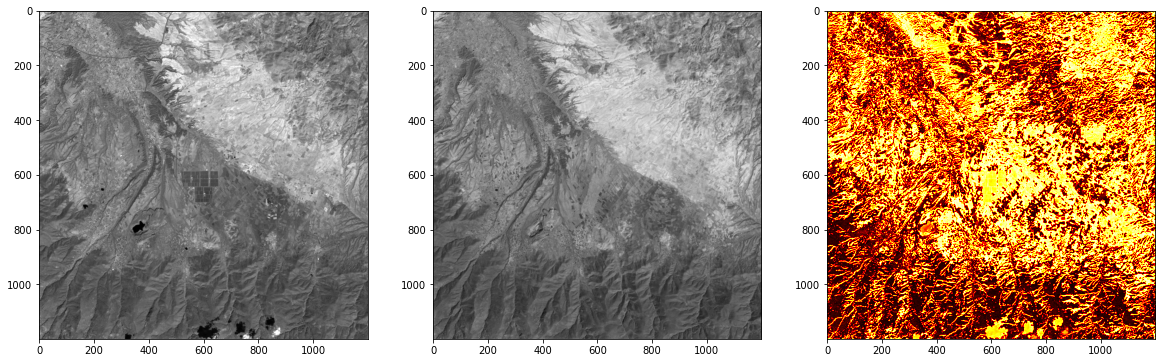

In [0]:
fig_width = 20
fig_height = 8

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(fig_width, fig_height))
ax1.imshow(image1, cmap="gray") 
ax2.imshow(image2, cmap="gray") 
ax3.imshow(diff_image, cmap="hot");

In [0]:


n_components=100

pca = PCA(n_components=n_components)
pca.fit(diff_image)

diff_image_pca = pca.fit_transform(diff_image)
print(diff_image_pca.shape)

diff_image_restored = pca.inverse_transform(diff_image_pca)
print(diff_image_restored.shape)



TypeError: ignored

In [0]:
import time

In [0]:
np.sum(pca.explained_variance_ratio_)

0.5778358571178703

In [0]:
print(f"The {n_components} components explain {int(np.sum(pca.explained_variance_ratio_) * 100)}% of the variance")

The 100 components explain 57% of the variance


Time = 3.6829829999999983 seconds


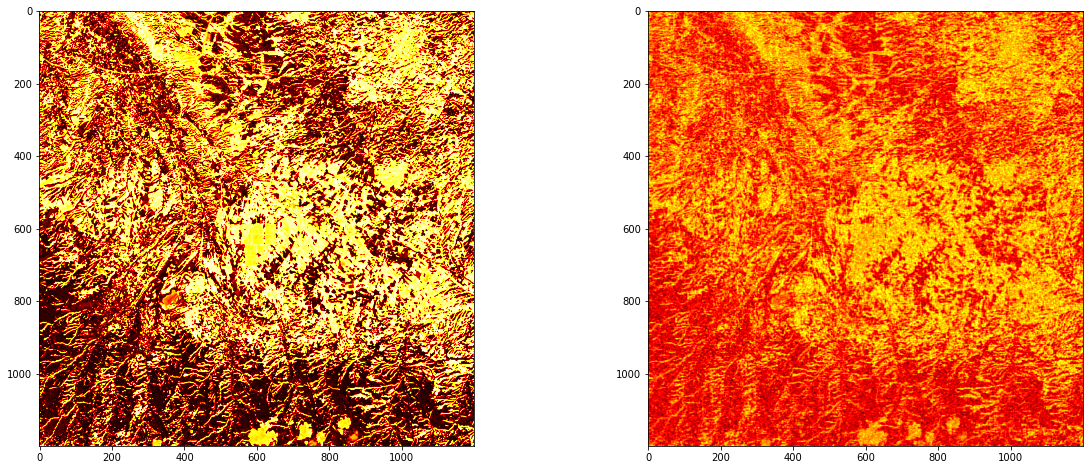

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

ax1.imshow(diff_image, cmap="hot") 
ax2.imshow(diff_image_restored, cmap="hot");
print("Time =", time.clock() - start_time, "seconds")  